# Numerisk derivasjon

Dersom vi vet den nøyaktige formen til en funksjon $f = f(x)$, kan vi bruke regnereglene vi kjenner til å derivere den.
I praksis kjenner vi ikke alltid formen til funksjonen vi vil studere, men har bare delvis informasjon om denne gjennom målinger, osv.
For eksempel kan det hende at vi bare kjenner til verdien av $f$ i en gitt liste av $x$-verdier.
I slike tilfeller kan vi finne tilnærminger av den deriverte ved hjelp av numerisk derivasjon.

## Differansemetoder
For en skalar funksjon $f = f(x)$ av én variabel husker vi at definisjonen av den deriverte $f'$ i punktet $x$ er
$$ f'(x) \doteq \lim_\limits{h\to0}\frac{f(x+h)-f(x)}{h}.$$
Dersom denne grensen eksisterer kan vi for eksempel ta $h = 1/n$ for $n = 1, 2, 3,\dots$, og definere
$$ g_n \doteq n\left( f(x+1/n) - f(x) \right) \ \substack{n \to \infty \\ \longrightarrow} \ f'(x).$$

Merk at i denne prosedyren må vi gjennom "uendelig mange steg" for å få grenseverdien, nettopp fordi vi må la $n \to \infty$.
I en numerisk beregning med en datamaskin vil vi derimot bare være i stand til å utføre endelig mange operasjoner.
En måte å få en tilnærming av $f'(x)$ kan da være å ta en stor verdi for $n$ og velge den tilhørende $g_n$.

Basert på idéen ovenfor har vi det som kalles *endelige differansemetoder* for å tilnærme deriverte av en funksjon $f$ i punktet $x$.
For $h > 0$ kan vi definere en *foroverdifferanse*
$$ \frac{f(x+h)-f(x)}{h}, $$
og en *bakoverdifferanse*
$$ \frac{f(x)-f(x-h)}{h}. $$
Vi kan også ta gjennomsnittet av dem og få det som kalles *sentraldifferanse*,
$$ \frac{f(x+h)-f(x-h)}{2h}. $$

Man kan vise at for en tilstrekkelig glatt funksjon $f$ vil feilen $|f'(x)-\Delta_h f(x)|$ vi gjør ved å tilnærme $f'(x)$ med en av disse differansene, som vi her kaller $\Delta_h f(x)$, avta lineært for forover- og bakoverdifferanser, og kvadratisk for sentraldifferansen.

For forover- og bakoverdifferanser har kan vi utlede formlene
$$\left|\pm\frac{f(x\pm h)-f(x)}{h} - f'(x)\right| = \frac{h}{2}|f''(c)| \quad \text{for en } c \text{ mellom } x \text{ og } x\pm h, \tag{1} $$
og for sentraldifferansen har vi
$$ \left| \frac{f(x+h)-f(x-h)}{2h} - f'(x) \right| = \frac{h^2}{6} |f'''(c)| \quad \text{for en } c \text{ slik at } x-h < c < x+h. \tag{2} $$

---
**Eksempel 1**:
La oss se på funksjonen $f(x) = e^{x}$ for verdien $x = 0$, og de tilsvarende differansene for $h = 1/n$, hvor $n = 1,\dots,20$.

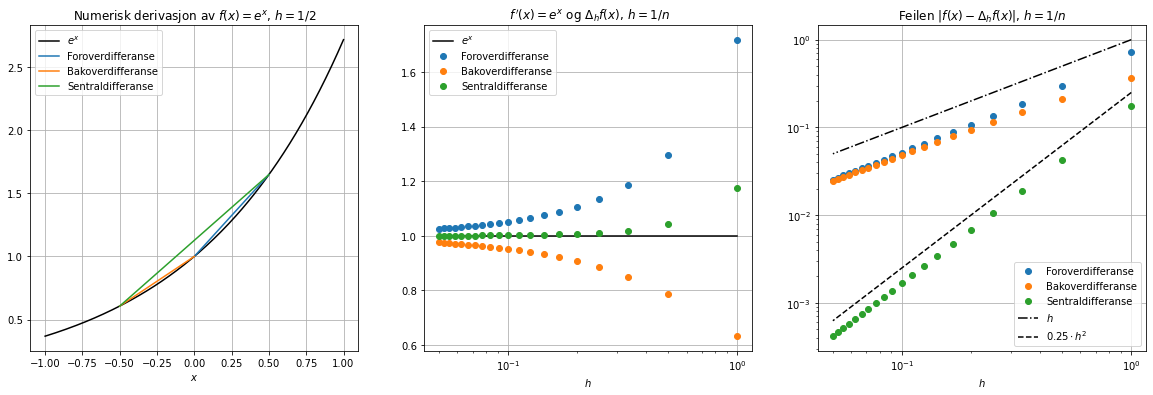

In [234]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

x = 0 # punktet vi vil finne den deriverte
N = 20 # antall verdier av h = 1/n, n = 1,...,N

g = np.zeros([N,3]) # matrise for differansene
H = np.array([1/n for n in range(1,N+1)]) # verdier av h

for n in range(0,N):
    h = H[n] #1/(n+1)
    g[n,0] = (np.exp(x+h)-np.exp(x))/h
    g[n,1] = (np.exp(x)-np.exp(x-h))/h
    g[n,2] = (np.exp(x+h)-np.exp(x-h))/(2*h)

xs = np.linspace(x-1,x+1,201)

fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
ax1.plot(xs,np.exp(xs),'k')
ax1.plot([x,x+0.5],[np.exp(x),np.exp(x+0.5)])
ax1.plot([x-0.5,x],[np.exp(x-0.5),np.exp(x)])
ax1.plot([x-0.5,x+0.5],[np.exp(x-0.5),np.exp(x+0.5)])
ax1.grid(True)
ax1.set_xlabel('$x$')
ax1.legend(['$e^x$','Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax1.set_title('Numerisk derivasjon av $f(x) = e^x$, $h = 1/2$')

ax2.semilogx(H,np.exp(x)*np.ones(N),'k') # plott med logaritmisk skalert x-akse
ax2.semilogx(H,g,'o')
ax2.set_xlabel('$h$')
ax2.legend(['$e^x$','Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax2.set_title(' $f\'(x) = e^x$ og $\Delta_h f(x)$, $h = 1/n$')
ax2.grid(True)

err = np.abs(g-np.exp(x))

ax3.loglog(H,err,'o')
ax3.loglog(H,H,'k-.')
ax3.loglog(H,0.25*H**2,'k--')
ax3.legend(['Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse','$h$','$0.25 \cdot h^2$'])
ax3.set_xlabel('$h$')
ax3.set_title('Feilen $|f(x)-\Delta_h f(x)|$, $h = 1/n$')
ax3.grid(True)

I plottet til venstre har vi plottet funksjonen $f(x) = e^x$ sammen med linjestykkene som definerer verdiene til de ulike differansene i punktet $x$ for $h=1/2$;
tilnærmingen av $f'(x)$ er gitt av stigningstallet for hvert linjestykke.
Merk at siden $f'' > 0$ for denne funksjonen er den deriverte $f'$ også økende; dermed vil foroverdifferansen konsekvent overestimere, og bakoverdifferansen vil konsekvent underestimere, $f'(x)$, og dette ser vi i det midterste plottet.
Da er det rimelig at sentraldifferansen, som er et gjennomsnitt av de foregående differansene, gir en bedre tilnærming.

Feilen er plottet til høyre, hvor vi ser at feilen med forover- og bakoverdifferanser er omtrent den samme, og avtar med samme stigningstall som $h$.
Videre ser vi at feilen med sentraldifferanser avtar raskere, som en kvadratisk funksjon av $h$.

> **Logaritmisk skalering**:
Vi ser at $h = 1/n$ blir veldig liten for større verdier av $n$, og det kan være vanskelig å skille punktene i et plott fra hverandre; da kan det være til hjelp å skalere aksene i plottet annerledes.
I det midterste plottet skalerer vi (på vanlig vis) $y$-aksen lineært, men $x$-aksen logaritmisk; det vil si, når vi går én enhet langs $y$-aksen går vi fra $y=k$ til $y=k+1$, men langs $x$-aksen går vi i stedet fra $x = 10^{k}$ til $x = 10^{k+1}$.
I plottet av feilen blir både $x$- og $y$-verdiene veldig små, så vi skalerer begge aksene logaritmisk.
I disse figurene har vi brukt henholdsvis kommandoene $\texttt{pyplot.semilogx}()$ og $\texttt{pyplot.loglog}()$ istedenfor $\texttt{pyplot.plot}()$.

---

### Numerisk ustabilitet
Tidligere har vi sett at vi kan få problemer med avrundingsfeil når vi utfører operasjoner med flyttall på en datamaskin.
Dette er også tilfelle her hvor vi for kontinuerlige $f$ og svært små $h$ vil subtrahere to omtrent like store tall og dele på et veldig lite:
dersom $h$ blir liten nok vil avrundingsfeilen bli dominerende, og vi vil få store avvik.
La oss se på samme eksempel igjen, men denne gangen for $h = 10^{-n}$ for $n = 0,\dots,10$



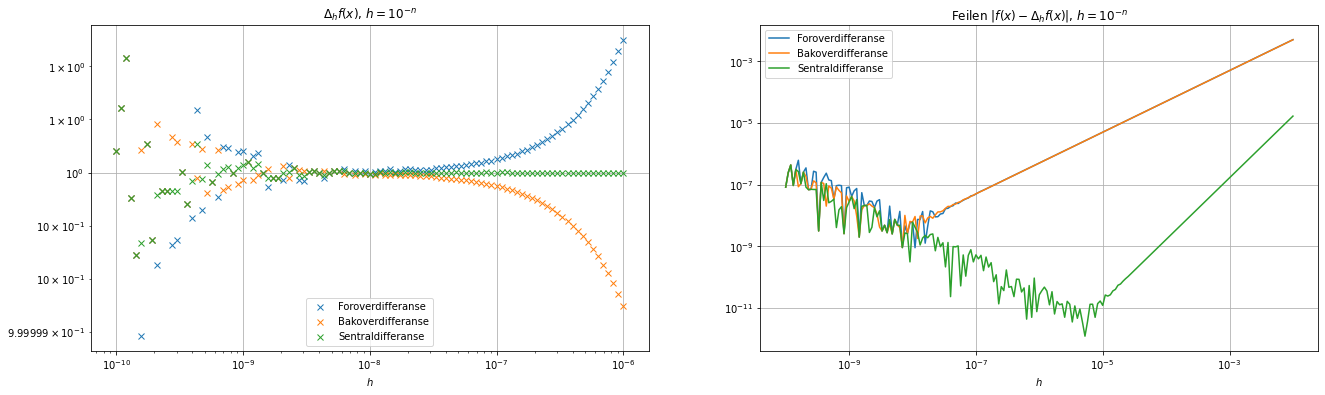

In [246]:
nmin = 2 # minste potens
nmax = 10 # største potens
M = 201

H = np.logspace(-nmin,-nmax,M) # logaritmisk jevnt fordelte punkter
g = np.zeros([M,3])


for n in range(0,M):
    h = H[n]
    g[n,0] = (np.exp(x+h)-np.exp(x))/h
    g[n,1] = (np.exp(x)-np.exp(x-h))/h
    g[n,2] = (np.exp(x+h)-np.exp(x-h))/(2*h)
    
err = np.abs(g-np.exp(x))
    
fig2, (ax4,ax5) = plt.subplots(1,2,figsize=(22,6))

ax4.loglog(H[100:],g[100:,:],'x')
ax4.set_xlabel('$h$')
ax4.set_title('$h = 10^{-n}$')
ax4.set_title('$\Delta_h f(x)$, $h = 10^{-n}$')
ax4.legend(['Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax4.grid(True)

ax5.loglog(H,err)
ax5.set_xlabel('$h$')
ax5.set_title('Feilen $|f(x)-\Delta_h f(x)|$, $h = 10^{-n}$')
ax5.legend(['Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
ax5.grid(True)


Legg merke til hvordan feilen avtar med jevn rate helt til $h \approx 10^{-5}$, hvor sentraldifferansen begynner å få problemer.
Forover- og bakover-differansene holder ut litt lenger, til omtrent $h \approx 10^{-8}$, før de også gir større feil.

Når vi representerer er flyttall på en datamaskin vil det alltid være en liten feil: vi kan skrive $\hat{f}(x) = f(x) + \epsilon$, hvor $f(x)$ er den faktiske funksjonsverdien, $\hat{f}(x)$ er flyttallsrepresentasjonen av funksjonsverdien, og $\epsilon$ er avviket mellom disse, $|\epsilon| \approx \epsilon_\text{mach}$, vanlig flyttallspresisjon har $\epsilon_\text{mach} \approx 2\cdot 10^{-16} $
***Detaljer om absolutt og relativ feil utelatt***

For å estimere feilen kan vi bruke trekantulikheten og feilformelen (2) som følger

$$ \left| f'(x) - \frac{\hat{f}(x+h)-\hat{f}(x-h)}{2h} \right| = \left| f'(x) - \frac{f(x+h)-f(x-h)}{2h} - \frac{\epsilon_2-\epsilon_1}{2h} \right| \le \frac{h^2}{6}|f'''(c)| + \frac{|\epsilon_2-\epsilon_1|}{2h} \le \frac{h^2}{6}|f'''(c)| + \frac{|\epsilon_2|+|\epsilon_1|}{2h} \lesssim \frac{h^2}{6}|f'''(x)| + \frac{\epsilon_\text{mach}}{h}.$$

Her har vi brukt at for $h > 0$ liten nok vil $f'''(c) \approx f'''(x)$, som i vårt tilfelle er $e^x = e^0 = 1$.
La oss estimere feilen vi gjør ved å si at feilen er mindre enn $E_\text{s}(h)$, en funksjon av $h$ definert som
$$ E_\text{s}(h) \doteq \frac{h^2}{6} + \frac{\epsilon_\text{mach}}{h}. $$
På tilsvarende vis kan vi bruke ligning (1) til å finne et estimat $E_\text{f}(h)$ for foroverdifferansen,
$$ E_\text{f}(h) \doteq \frac{h}{2} + \frac{2 \epsilon_\text{mach}}{h}. $$

Legg merke til at $E_\text{s}''(h) > 0$ (og $E_\text{f}''(h) > 0$) for $h > 0$, så et kritisk punkt $h = h_\text{s}$ hvor $E_\text{s}'(h) = 0$ vil være et minimum, og feilen vil øke igjen for $h > h_\text{s}$.

Vi løser for $h$ i de to tilfellene og finner
$$ 0 = E_\text{s}'(h) = \frac{h}{3} - \frac{\epsilon_\text{mach}}{h^2} \implies h_\text{s} = \sqrt[3]{3 \epsilon_\text{mach}}, \qquad \text{og} \qquad 0 = E_\text{f}'(h) = \frac12 - \frac{2\epsilon_\text{mach}}{h^2} \implies h_\text{f} = 2 \sqrt{\epsilon_\text{mach}}. $$


In [247]:
epsi = np.finfo(float).eps # maskinvare-epsilon for talltypen float
h_s = np.cbrt(3*epsi)
h_f = 2*np.sqrt(epsi)
       
print('Det kritiske punktet for sentraldifferanse-feilen er omtrent {:.2e}, imens for foroverdifferanse er det kritiske punktet omtrent {:.2e}.'.format(h_s,h_f))

Det kritiske punktet for sentraldifferanse-feilen er omtrent 8.73e-06, imens for foroverdifferanse er det kritiske punktet omtrent 2.98e-08.


Vi ser at dette stemmer ganske godt med grafene ovenfor!

Moralen er at når vi utfører numerisk derivasjon må vi være påpasselige med å ikke ta for små steg $h$ i forhold til flyttallspresisjonen vi opererer med.

**Kilder**: Sauer kap. 5.1

## Anvendelse: Estimering av hastighet
Dersom vi deriverer en funksjon $x = x(t)$ som uttrykker posisjonen til et objekt langs $x$-aksen som funksjon av tid $t$, vil vi som kjent få hastigheten $v = v(t)$ ved tid $t$: $x'(t) = v(t)$.

Gitt en rekke målinger $\{x_k\}_{k=0}^{n}$ av posisjonen $x$ på tidspunkter $t_0 < \dots < t_k < \dots < t_n$, vil forhåpentlig, dersom målingene er nøyaktige nok, $x_k$ være en god tilnærming av $x(t_k)$.
Videre, dersom tiden mellom påfølgende målinger er relativt liten kan vi bruke differansene som vi så tidligere til å beregne tilnærminger av hastigheten i hvert målepunkt.
Hastigheten $v(t_k)$ ved $t=t_k$ kan da estimeres ved hjelp av foroverdifferanse, bakoverdifferanse eller sentraldifferanse:

$$ \frac{x(t_{k+1})-x(t_k)}{t_{k+1}-t_k} \quad k = 0,\dots,n-1, \qquad \frac{x(t_{k})-x(t_{k-1})}{t_{k}-t_{k-1}} \quad k = 1,\dots,n, \qquad \text{eller} \qquad \frac{x(t_{k+1})-x(t_{k-1})}{t_{k+1}-t_{k-1}}, \quad k = 1,\dots,n-1,$$

hvor vi igjen tilnærmer $x(t_k)$ med målingen $x_k$.

### kanskje ta dette i eget ark, etter å ha presentert integrasjon?